In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Kay\Downloads\EPL_20_21.csv')




In [2]:
#Let's see the data we have.
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
#Let's see how many rows and columns our data we has.
df.shape

(532, 18)

In [3]:
#Let's see general info of our data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [5]:
df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [12]:
#To see explicitly by column, how many NaN values our data has.
df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [9]:
#Number of unique clubs in the EPL 20/21 Season
np.size(df['Club'].unique())

20

In [10]:
#Number of Players in the EPL 20/21 Season
np.size(df['Name'].unique())

524

In [6]:
#To find number of duplicated rows(i.e the entire row is duplicated)
df.duplicated().sum()

0

In [7]:
#To find duplicated Names in the Name column of the dataframe
df.duplicated(subset= ['Name']).sum()

8

In [16]:
#To display the duplicated rows(i.e the entire row, original and duplicate)
#df.loc[df.duplicated(subset= ['Name']), :]
df.loc[df['Name'].duplicated(keep= False), :]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0
26,Ross Barkley,Chelsea,ENG,MF,26,2,0,42,0,0,26,84.6,0,0,0.06,0.16,0,0
103,Takumi Minamino,Liverpool FC,JPN,"MF,FW",25,9,2,293,1,0,139,79.9,0,0,0.20,0.00,0,0
157,Robert Snodgrass,West Ham United,SCO,"FW,DF",32,3,0,5,0,0,3,100.0,0,0,0.00,0.00,0,0
204,Ainsley Maitland-Niles,Arsenal,ENG,DF,22,11,5,490,0,0,288,78.5,0,0,0.02,0.04,0,0
206,Mathew Ryan,Arsenal,AUS,GK,28,3,3,270,0,0,67,92.5,0,0,0.00,0.00,0,0
207,Joe Willock,Arsenal,ENG,MF,20,7,2,238,0,0,91,75.8,0,0,0.17,0.02,1,0
261,Theo Walcott,Everton,ENG,FW,31,1,0,13,0,0,1,100.0,0,0,0.00,0.00,0,0
274,Ross Barkley,Aston Villa,ENG,MF,26,24,18,1531,3,1,764,81.0,0,0,0.19,0.21,0,0
307,Joe Willock,Newcastle United,ENG,MF,20,14,11,978,8,0,235,77.0,0,1,0.33,0.07,0,0


We can see that the duplicates are as a result of the loan spell some players had within the EPL 20/21 Season.

In [17]:
#Number of Nationalties in the EPL 20/21 Season
np.size(df['Nationality'].unique())

59

I intend to investigate the correlation between age and soccer performance

In [37]:
#These are the youngest players in the EPL 20/21 Season 

df[df['Age'] == df['Age'].min()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.0,0,0
182,Dane Scarlett,Tottenham Hotspur,ENG,FW,16,1,0,1,0,0,0,-1.0,0,0,0.00,0.0,0,0
284,Carney Chukwuemeka,Aston Villa,ENG,"FW,MF",16,2,0,20,0,0,8,62.5,0,0,0.29,0.0,0,0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.0,0,0


In [64]:
#This is the oldest players in the EPL 20/21 Season 
df[df['Age'] == df['Age'].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,AgeGroup
22,Willy Caballero,Chelsea,ARG,GK,38,1,1,90,0,0,26,92.3,0,0,0.0,0.0,0,0,30 and above


In [44]:
#Average age of players in the EPL 20/21 Season 
df['Age'].mean()

25.5

In [2]:

age_point = df.groupby(['Age'])['Position'].count().reset_index()
age_point = age_point.sort_values(by='Position', ascending=False)
#age_point#.to_clipboard(excel=True,sep='\t')

Text(0, 0.5, 'REPRESENTATION')

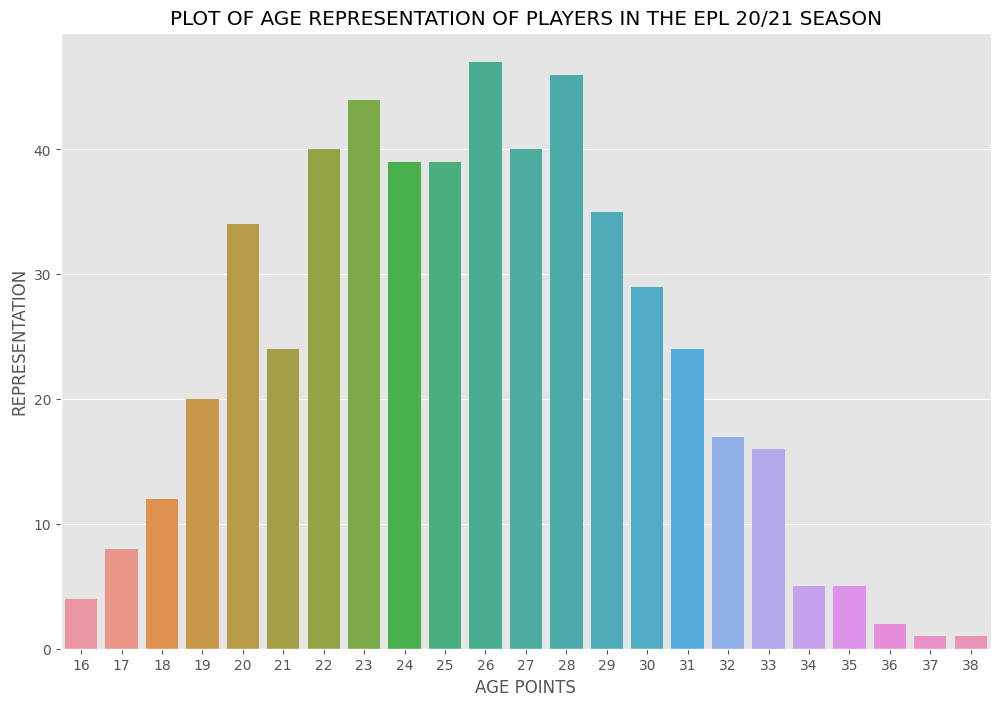

In [60]:
plt.figure(figsize=(12,8))
matplotlib.rcParams['font.size']=10
sns.barplot(x='Age',y='Position',data=age_point)
plt.title('PLOT OF AGE REPRESENTATION OF PLAYERS IN THE EPL 20/21 SEASON')
plt.xlabel('AGE POINTS')
plt.ylabel('REPRESENTATION')

In [9]:
#Grouping Ages into Age Groups
bins= [16,22,30, 40]
labels = ['16-21','22-29','30 and above']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,AgeGroup
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,16-21
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,22-29
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,22-29
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,22-29
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,16-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.10,0,0,22-29
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.00,0,0,22-29
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.00,0,0,16-21
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.00,0,0,16-21


In [148]:
# agegroup_mins = df.groupby("AgeGroup").agg(percentage =('Mins', lambda p: (p.sum() / df['Mins'].sum()) * 100)).round(2)
# agegroup_mins

In [147]:
# #Seaborn barplot
# sns.set_style("whitegrid")
# matplotlib.rcParams['font.size']=10
# bar,ax = plt.subplots(figsize=(10,6))
# ax = sns.barplot(x=agegroup_mins.index, y='percentage', data=agegroup_mins, errorbar=None, palette="muted",orient='v' )
# ax.set_title("PLOT OF AGE GROUPS OF PLAYERS VS % MUNITES PLAYED IN THE EPL 20/21 SEASON", fontsize=15)
# ax.set_xlabel ("Age Group")
# ax.set_ylabel ("% Minutes Played")
# # calculate the percentages and annotate the sns barplot
# for rect in ax.patches:
#     ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
# bar.savefig("Seaborn_Pie_Chart.png");

In [10]:
#groupby the data by AgeGroup type
data = df.groupby("AgeGroup")["Mins"].sum()
data

AgeGroup
16-21            75174
22-29           544669
30 and above    131045
Name: Mins, dtype: int64

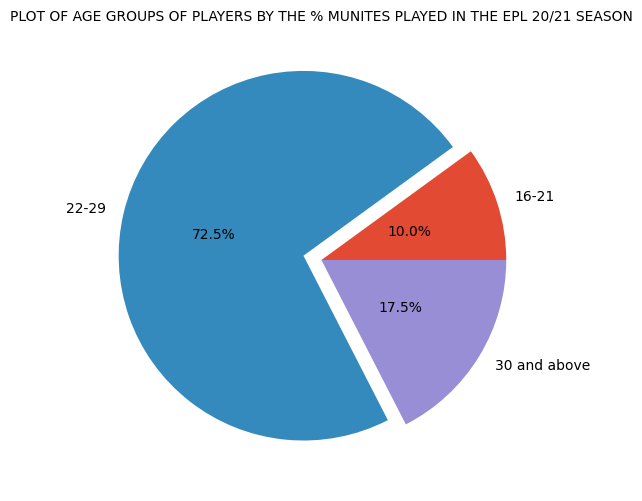

In [12]:
#Using matplotlib
matplotlib.rcParams['font.size']=10
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0, 0.1,0], labels=labels, pctdistance=0.5)
plt.title("PLOT OF AGE GROUPS OF PLAYERS BY THE % MUNITES PLAYED IN THE EPL 20/21 SEASON", fontsize=10);
pie.savefig("DeliveryPieChart.png")

In [13]:
goals_position = df.groupby("Position").agg(percentage =('Goals', lambda p: (p.sum() / df['Goals'].sum()) * 100)).round(2)
goals_position = goals_position.sort_values(by= 'percentage',  ascending=False)
goals_position#.to_clipboard(excel=True,sep='\t')

,percentage
Position,
FW,44.83
MF,17.34
DF,13.08
"FW,MF",12.58
"MF,FW",8.42
"MF,DF",1.42
"DF,MF",1.12
"FW,DF",0.81
"DF,FW",0.30


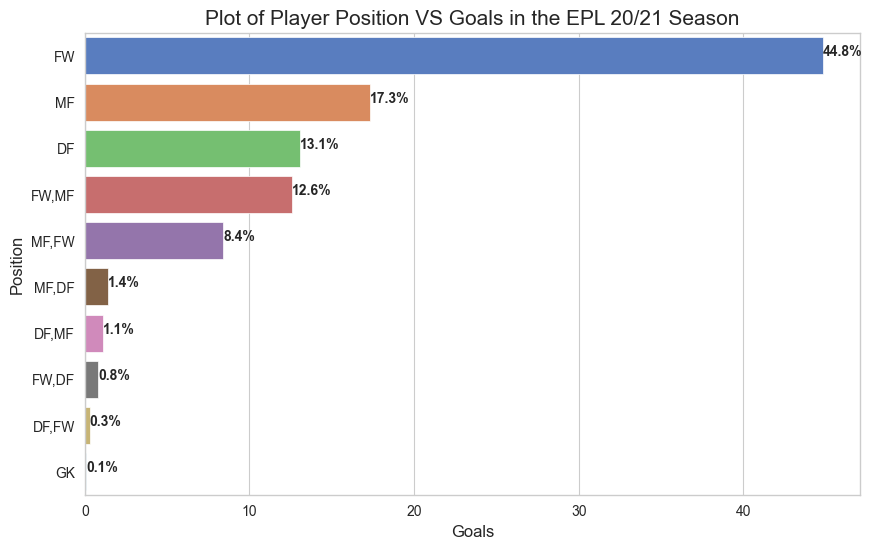

In [14]:
#Seaborn barplot
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='percentage', y=goals_position.index, data=goals_position, errorbar=None, palette="muted",orient='h' )
ax.set_title("Plot of Player Position VS Goals in the EPL 20/21 Season", fontsize=15)
ax.set_xlabel ("Goals")
ax.set_ylabel ("Position")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )
bar.savefig("Seaborn_Bar_Vertical.png");

In [15]:
new_df = df.drop(['Name', 'Club', 'Nationality', 'Position', 'AgeGroup'], axis=1)

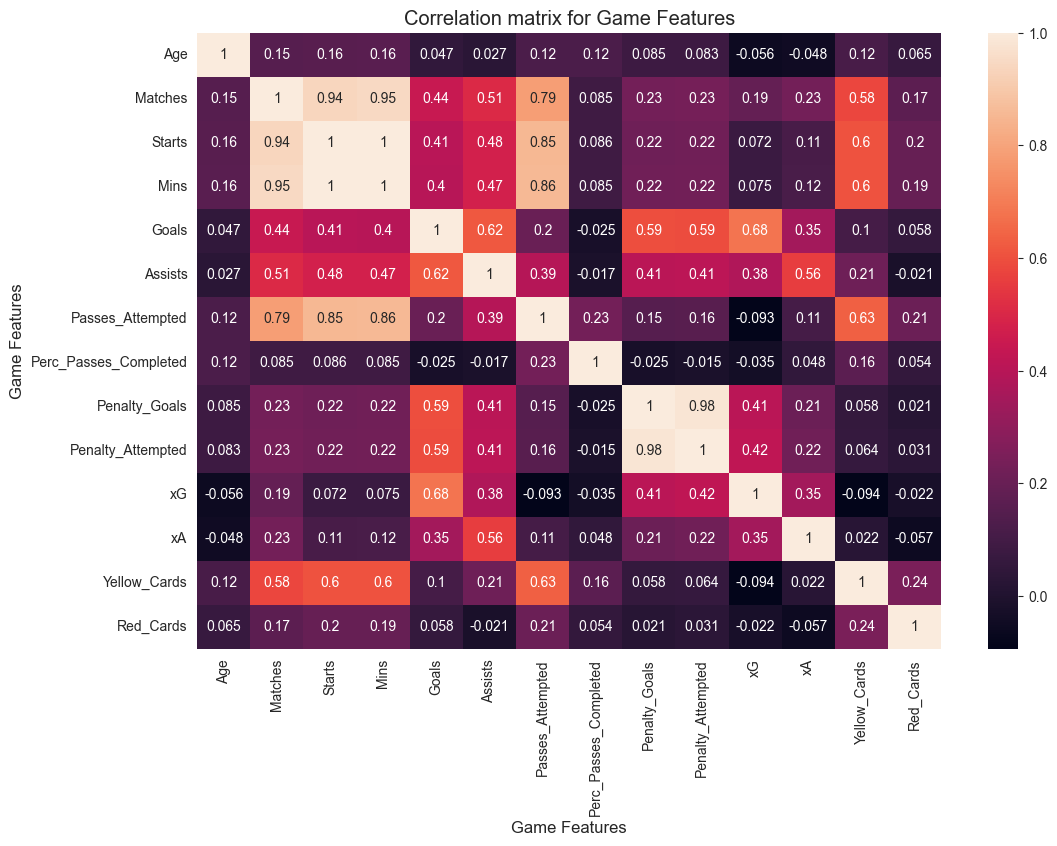

In [16]:
#correlation heat map
#correlation between numerical columns
correlation_matrix = new_df.dropna().corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Game Features")

plt.xlabel("Game Features")

plt.ylabel("Game Features")

plt.show()

In [47]:
#Comparing the performance of a club with its Average Age.
club_per_age= df.groupby(['Club']).agg({
'Age': 'mean',
'Goals': 'sum', 
'Assists': 'sum',
'Perc_Passes_Completed': 'mean'}).round(2)
club_per_age = club_per_age.sort_values(by='Age',  ascending=True)
club_per_age#.to_clipboard(excel=True,sep='\t')

,Age,Goals,Assists,Perc_Passes_Completed
Club,,,,
Manchester United,23.86,70,51,81.66
Southampton,24.14,47,33,72.96
Aston Villa,24.29,52,38,76.80
Wolverhampton Wanderers,24.44,34,21,81.32
Brighton,24.56,39,24,71.99
Sheffield United,24.81,19,13,74.04
Arsenal,24.97,53,38,81.26
Fulham,25.04,26,18,81.71
Leeds United,25.35,60,45,79.38


From the result above it is obvious that the team with the youngest team is not necessarily the team with the best performance.

In [51]:
#Compairing the total performance of each age group in the League of the 20/21 Season.
per_agegroup = df.groupby(['AgeGroup']).agg({
'Age': 'mean',
'Goals': 'sum', 
'Assists': 'sum',
'Mins' : 'sum',
'Perc_Passes_Completed': 'mean',
'Penalty_Goals': 'sum',
'Red_Cards': 'sum'}).round(2)
per_agegroup = per_agegroup.sort_values(by='Goals', ascending=False)
per_agegroup#.to_clipboard(excel=True,sep='\t')

,Age,Goals,Assists,Mins,Perc_Passes_Completed,Penalty_Goals,Red_Cards
AgeGroup,,,,,,,
22-29,25.48,759,522,544669,78.77,78,38
30 and above,31.78,128,91,131045,78.50,20,8
16-21,19.41,99,72,75174,74.08,4,2


From the result above we can see that the 22-29 Age performed better than other age groups in goals, assists, minutes played and percentage of pass completed. 
The Red cards shows poor decision making which gets better with experience.

In [59]:
#Comparing Position, Age group performance in percentages
pos_agegroup = df.groupby(['Position', 'AgeGroup']).agg(
    percent_goals =('Goals', lambda p: (p.sum() / df['Goals'].sum()) * 100),
    percent_assists =('Assists', lambda p: (p.sum() / df['Assists'].sum()) * 100),
    percent_mins =('Mins', lambda p: (p.sum() / df['Mins'].sum()) * 100)).round(2)
pos_agegroup#.to_clipboard(excel=True,sep='\t')


percent_goals  percent_assists  percent_mins
Position AgeGroup                                                  
DF       16-21                  1.01             1.75          2.80
         22-29                  9.63            15.47         25.55
         30 and above           2.43             2.63          6.99
DF,FW    16-21                  0.00             0.00          0.01
         22-29                  0.20             0.44          0.30
         30 and above           0.10             0.73          0.23
DF,MF    16-21                  0.10             0.00          0.65
         22-29                  1.01             0.73          1.62
         30 and above           0.00             1.02          0.91
FW       16-21                  1.93             1.31          0.94
         22-29                 35.90            20.58         11.06
         30 and above           7.00             3.21          1.78
FW,DF    16-21                  0.71             0.88          0.50
         22-29                  0.10             0.29          0.25
         30 and above           0.00             0.00          0.00
FW,MF    16-21                  3.04             2.34          1.24
         22-29                  8.01            10.22          5.15
         30 and above           1.52             1.90          0.91
GK       16-21                  0.00             0.00          0.45
         22-29                  0.10             0.29          5.59
         30 and above           0.00             0.00          3.07
MF       16-21                  1.62             1.90          2.02
         22-29                 14.30            18.83         17.03
         30 and above           1.42             2.92          2.65
MF,DF    16-21                  0.10             0.00          0.23
         22-29                  1.22             2.34          2.08
         30 and above           0.10             0.29          0.40
MF,FW    16-21                  1.52             2.34          1.17
         22-29                  6.49             7.01          3.92
         30 and above           0.41             0.58          0.50

<Axes: ylabel='Position,AgeGroup'>

<Figure size 3000x1000 with 0 Axes>

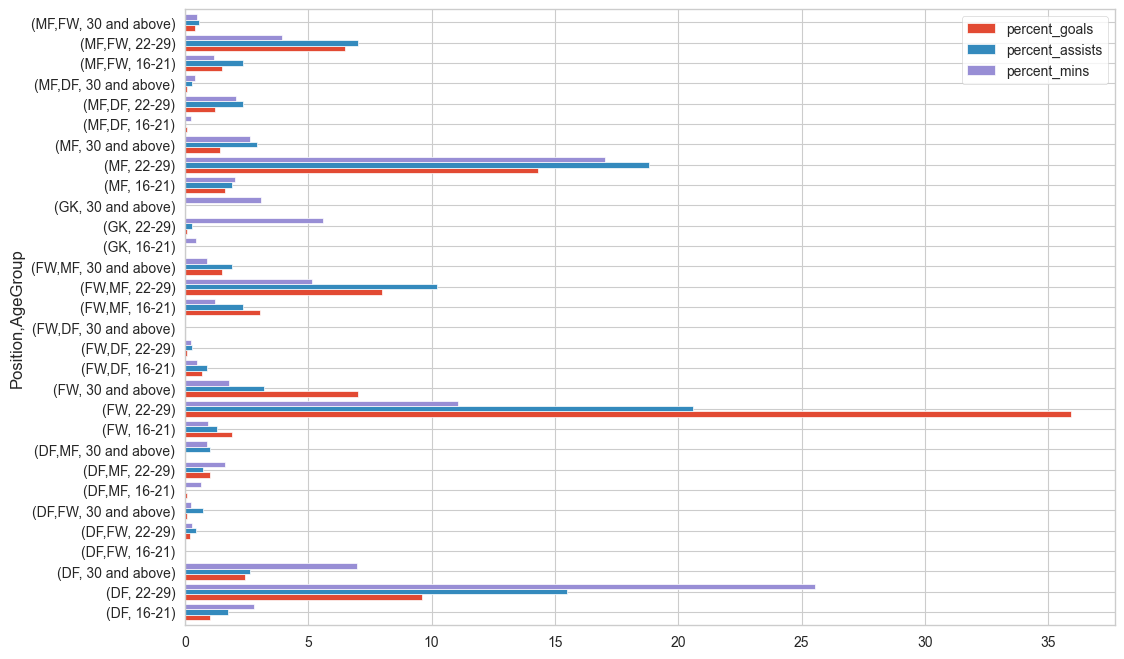

In [60]:
# Plot grouped horizontal bar chart
plt.figure(figsize=(30,10))
matplotlib.rcParams['font.size']=10
pos_agegroup.plot.barh(width = 0.8, align= 'center')


From the above Plot it is evident that the 22-29 Age Group has the best perfromance in the EPL 20/21 Season.
This result is to be expected, has high soccer performance is a blend of youth and experience in the right proportion.